# Introduction to sharing interactive Jupyter notebooks
## From the workshop '[Getting Started with Reproducible and Open Research](https://escience-academy.github.io/2020-02-11-Reproducible-and-Open-Research/)'

_Date: 11-12 February 2020_  
_Author: Sam Nooij_

---

In this example notebook, I will:

1. Load data from [gapminder](https://www.gapminder.org)

2. Use the Python library `pandas` to explore and visualise the data

3. Create (interactive) figures with `matplotlib`, `plotnine` and `ipywidgets`

## Loading data

In [1]:
import pandas as pd
from pathlib import Path #this function helps use paths in a platform-independent way

In [2]:
pd.__version__

'1.0.1'

In [3]:
data_path = Path("./data/")

### Check which files were downloaded

In [4]:
list(data_path.glob('*'))

[PosixPath('data/population_total.csv'),
 PosixPath('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv'),
 PosixPath('data/life_expectancy_years.csv')]

In [5]:
population = pd.read_csv(data_path / "population_total.csv")

In [6]:
population["country"]

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
190      Venezuela
191        Vietnam
192          Yemen
193         Zambia
194       Zimbabwe
Name: country, Length: 195, dtype: object

In [7]:
population["2089"]

0       72100000
1        1860000
2       62800000
3          64600
4      152000000
         ...    
190     42700000
191    110000000
192     54800000
193     82400000
194     39800000
Name: 2089, Length: 195, dtype: int64

### Open all three csv files downloaded from gapminder.org as DataFrames

In [8]:
population = pd.read_csv(data_path / "population_total.csv", index_col="country")
life_expectancy = pd.read_csv(data_path / "life_expectancy_years.csv", index_col="country")
income = pd.read_csv(data_path / "income_per_person_gdppercapita_ppp_inflation_adjusted.csv", index_col="country")

In [9]:
population.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,71900000,71800000,71600000,71500000,71300000,71200000,71000000,70800000,70600000,70400000
Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,422000,...,1820000,1800000,1780000,1760000,1740000,1720000,1710000,1690000,1670000,1660000
Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2570000,2580000,2590000,...,62800000,62800000,62800000,62800000,62800000,62800000,62700000,62700000,62600000,62600000
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,64300,64200,64100,63900,63800,63700,63500,63400,63300,63100
Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,156000000,158000000,160000000,162000000,164000000,166000000,167000000,169000000,171000000,173000000


In [10]:
population.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=195)

In [11]:
population.T.head() #transposes the table

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800,3280000,410000,2500000,2650,1570000,37000,534000,413000,351000,3210000,...,12300000,6800000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1801,3280000,412000,2510000,2650,1570000,37000,534000,413000,350000,3210000,...,12500000,6930000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1802,3280000,413000,2520000,2650,1570000,37000,534000,413000,349000,3220000,...,12600000,7070000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1803,3280000,414000,2530000,2650,1570000,37000,534000,413000,348000,3230000,...,12800000,7200000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1804,3280000,416000,2540000,2650,1570000,37000,534000,413000,348000,3240000,...,13000000,7340000,55000,1920000,27800,718000,6550000,2590000,747000,1090000


## Visualise population sizes per year in a few countries

**1 Portugal**

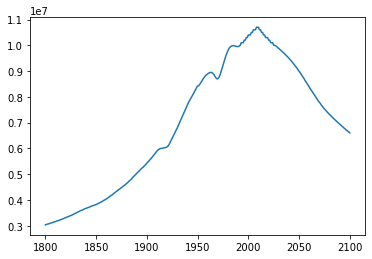

In [12]:
population.T["Portugal"].plot()

**2 The Netherlands**

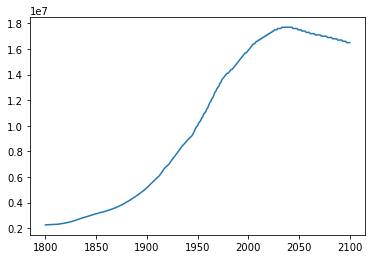

In [13]:
population.T["Netherlands"].plot()

**3 Japan**

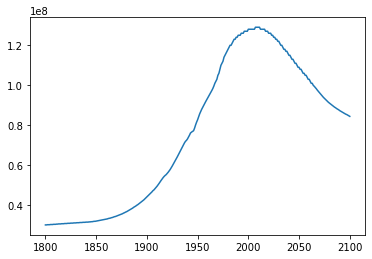

In [14]:
population.T["Japan"].plot()

**4 Kenya**

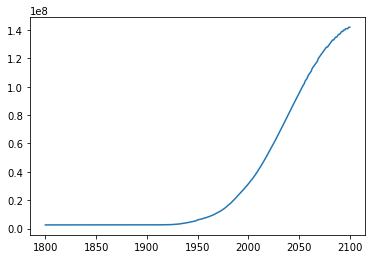

In [15]:
population.T["Kenya"].plot()

### Now start looking into the life expectancy data

In [16]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: float64(219)
memory usage: 321.4+ KB


**For which countries do we have population size data, but not the life expectancy?**

In [17]:
life_expectancy.index ^ population.index

Index(['Holy See', 'Liechtenstein', 'Monaco', 'Nauru', 'Palau', 'San Marino',
       'St. Kitts and Nevis', 'Tuvalu'],
      dtype='object', name='country')

In [18]:
set(population.index) - set(life_expectancy.index) 

{'Holy See',
 'Liechtenstein',
 'Monaco',
 'Nauru',
 'Palau',
 'San Marino',
 'St. Kitts and Nevis',
 'Tuvalu'}

**And for which countries do we have income data, but no life expectancy?**

In [19]:
income.index ^ life_expectancy.index

Index(['Monaco', 'Nauru', 'Palau', 'San Marino', 'St. Kitts and Nevis',
       'Tuvalu'],
      dtype='object', name='country')

### As an example, visualise income vs. life expectancy in Yemen

In [20]:
yemen = pd.concat([income.T["Yemen"].rename("income"),
           life_expectancy.T["Yemen"].rename("life_expectancy")],
          axis = 1)

In [21]:
from plotnine import ggplot, geom_point, aes

/home/snooij/miniconda3/envs/ROR_workshop/lib/python3.8/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 22 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


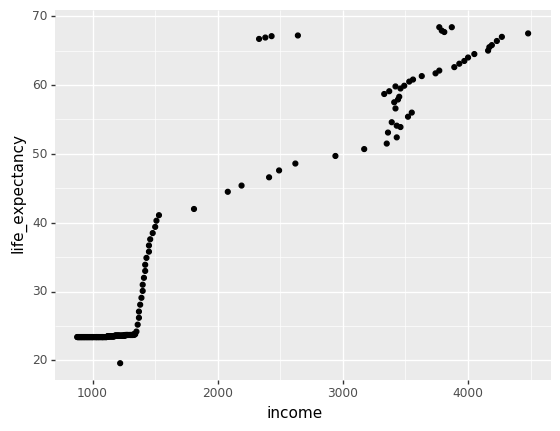

<ggplot: (8774558509081)>

In [22]:
ggplot(yemen, aes("income", "life_expectancy")) + geom_point()

### Now try out matplotlib

In [23]:
from matplotlib import pyplot as plt
import numpy as np

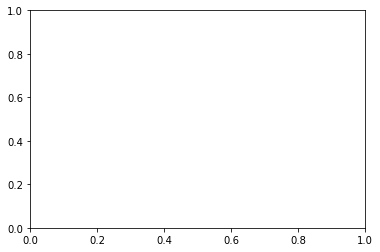

In [24]:
fig, ax = plt.subplots()

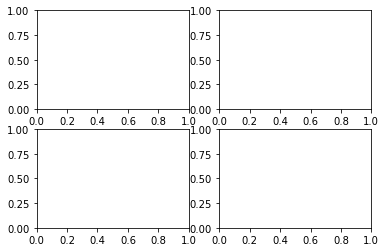

In [25]:
fig2, ax2 = plt.subplots(2, 2)

**As an example, we will look at the income vs. life expectancy again, but now for all countries, whose population sizes are represented as circle size.**

In [26]:
example_df = pd.concat([
    population["1900"].rename("population"),
    life_expectancy["1900"].rename("life_expectancy"),
    income["1900"].rename("income")
], axis = 1, join = "inner")

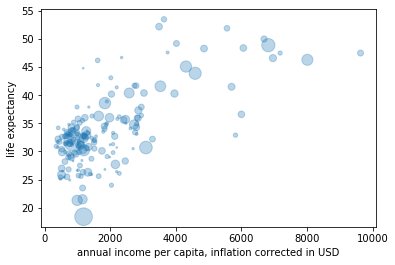

In [27]:
fig, ax = plt.subplots()
ax.scatter(example_df["income"], example_df["life_expectancy"], s=np.sqrt(example_df["population"])/50, alpha=0.3)
ax.set_xlabel("annual income per capita, inflation corrected in USD")
ax.set_ylabel("life expectancy")
fig.savefig("bubbleplot.svg")
plt.show()

Generally, life expectancy is higher in countries with a higher annual income (Figure 1).

![My first bubble plot](bubbleplot.svg)
**Figure 1. My first bubble plot.** Saved as svg image.

---

### Now modularise the code for easier re-use of the same function

**Also increase the plot size for more convenient viewing in the notebook.**

In [28]:
def gapminder_bubble(year: int):
    year_str = str(year)
    x = pd.concat([
        population[year_str].rename("population"),
        life_expectancy[year_str].rename("life_expectancy"),
        income[year_str].rename("income")], axis = 1, join = "inner")
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(x["income"], x["life_expectancy"], s=np.sqrt(x["population"])/50, alpha=0.3)
    ax.set_xlabel("annual income per capita, inflation corrected in USD")
    ax.set_ylabel("life expectancy")
    ax.set_xlim(300, 1e5)
    ax.set_ylim(0, 90)
    ax.set_xscale("log")
    return fig, ax
#We are going to make a function for plotting different years

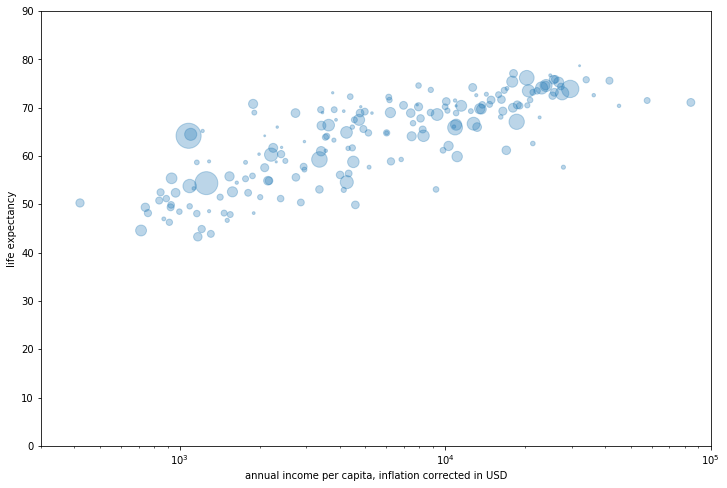

In [29]:
fig, ax = gapminder_bubble(1980)

**These are the life expectancies per annual income for all listed countries in the year 1980.**

---

_Notes to self:_

> Now you could lookup ipywidgets to make interactive figures with a slider for years.

> Look at the [ipywidgets documentation](https://ipywidgets.readthedocs.io/en/stable/user_install.html) for installation instructions. (It involves installing `ipywidgets` and `nodejs` with conda, and then running another command in the shell to install the extension.)

The figure below only works in interactive environments, e.g. by running the notebook on [MyBinder](https://mybinder.org/v2/gh/samnooij/reproducible_science_workshop-20200211/master?filepath=analysis%2FGapminder.ipynb). It is an interactive view of the above figure, using a slider to select the year (between 1800 and 2018).

In [30]:
from ipywidgets import interact

In [31]:
interact(gapminder_bubble, year=(1800, 2018))

interactive(children=(IntSlider(value=1909, description='year', max=2018, min=1800), Output()), _dom_classes=(…

<function __main__.gapminder_bubble(year: int)>